# EDA Homework 3
#### Sep 22, 2020
#### By: Vaishnavi & Flora

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import bisect
import matplotlib as mpl 
from matplotlib import colors
from matplotlib.colorbar import ColorbarBase
%config InlineBackend.figure_format = 'retina'
# %matplotlib

# Question 1

In [2]:
data = dict(
    segment=['Segment 1','Segment 2','Segment 3','Segment 4','Segment 5','Segment 6','Segment 7'],
    us=[16,7,10,10,10,32,15],
    our=[9,10,15,18,17,20,11])

customer = pd.DataFrame(data)
customer = customer[['us','our']].T
customer.columns = data['segment']


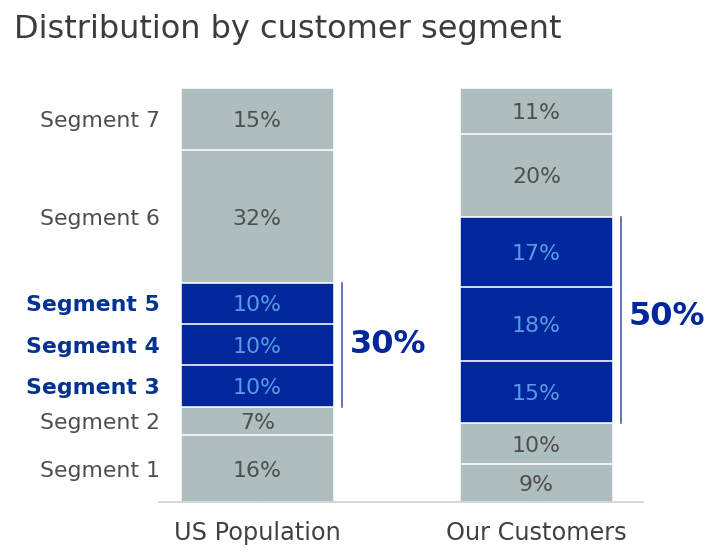

In [3]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

for i, columns in enumerate(reversed(customer.columns)):
    bar_color = ('#00279B' if i in [2,3,4] else '#AEBDBE')
    bar_height = customer.loc[:, :columns].sum(axis=1)
    label_height = bar_height - customer.loc[:, columns] / 2 - 1.8
    label_color = ('#5B9AE5' if i in [2,3,4] else '#4E4E4E')
    label_weight = ('bold' if i in [2,3,4] else 'regular')
    axis_color = ('#033290' if i in [2,3,4] else '#4E4E4E')
    
    # draw segments
    ax.bar(customer.index, bar_height
          ,color=bar_color, edgecolor='white', linewidth=0.8
          ,width=0.55)
    
    # label segments
    for i, height in enumerate(label_height):
        ax.text(i, height, str(customer.loc[:, columns][i]) + '%' , 
                ha='center', color=label_color, 
                fontdict=dict(fontsize=11
               ,weight='light'))
    
    # label axis        
    ax.text(-0.35, label_height[0], columns, 
        ha='right', color=axis_color, 
        fontdict=dict(fontsize=11
        ,weight=label_weight))
    
# axis configurations
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#CDD0CE')
ax.get_yaxis().set_visible(False)
ax.tick_params(length=6, color='white')

# set x-tick labels
ax.set_xticks([0,1])
ax.set_xticklabels(['US Population','Our Customers']
                   ,fontsize=12
                  ,color='#414141', fontweight='medium')

# draw annotations

ax.plot([0.55/2*1.1,0.55/2 *1.1], [23,53], c='#415BA3', lw=.8)
ax.plot([0.55/2*1.1+1,0.55/2 *1.1+1], [19,69], c='#415BA3', lw=.8)
ax.text(0.55/2*1.2, 36, '30%', ha='left', 
        color='#00279B', fontsize=16, fontweight='bold')
ax.text(0.55/2*1.2+1, 43, '50%', ha='left', 
        color='#00279B', fontsize=16, fontweight='bold')

# add title
ax.set_title('Distribution by customer segment' +' '*8
             ,loc='right' ,pad=15
            ,fontsize=16 ,color='#3C3C3C', fontweight='roman')

plt.tight_layout()
plt.show()

# Question 2

In [4]:
df_life = pd.read_csv("life-expectancy-at-birth-total-years.csv")
df_life = df_life.rename(columns={"Life expectancy at birth, total (years)": "Life Expectancy"})


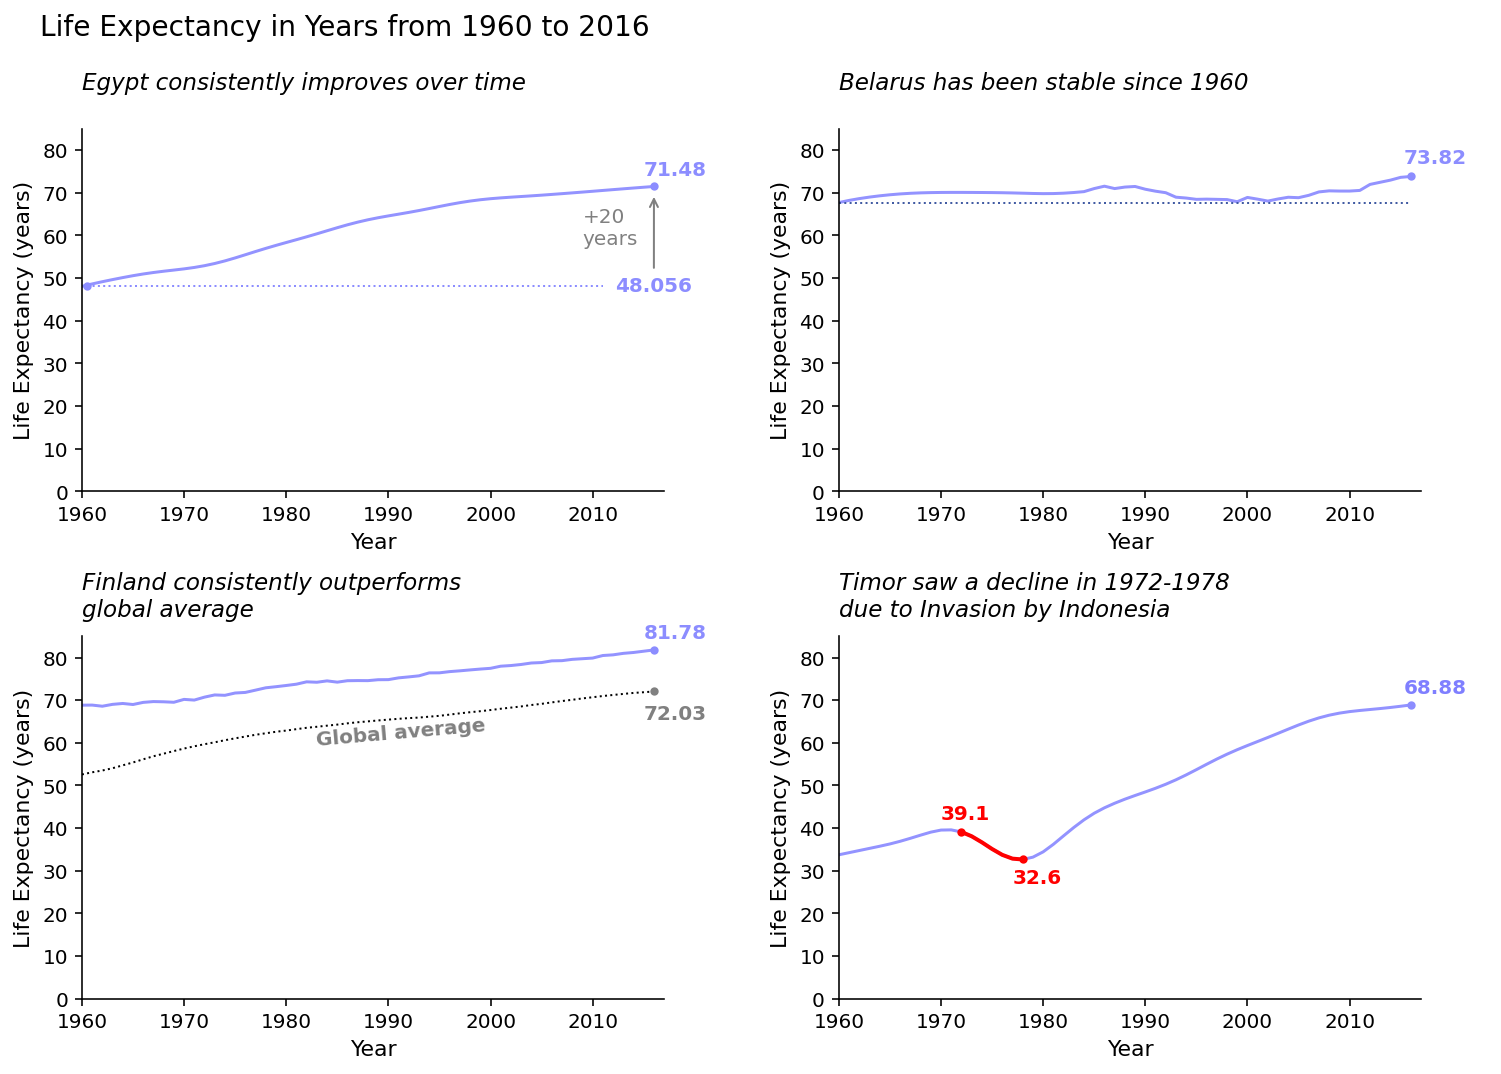

In [169]:
# Putting 4 graphs of 4 countries together

# lg = '#808080'
lg='black'
def axis_plot(ax):
    ax.set_ylim(0, 85)
    ax.set_xlim(1960, 2017)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_color(lg)
    ax.spines["left"].set_color(lg)
#     ax.tick_params(color=lg, labelcolor=lg)
    
    ax.set_ylabel("Life Expectancy (years)", fontsize=11, color=lg)
    ax.set_xlabel("Year", fontsize=11, color=lg)
    return ax

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,8),
                                            gridspec_kw={'hspace': 0.4, 'wspace':0.3})


# Egypt
df_life[df_life['Entity'] == 'Egypt'].plot(x='Year', y='Life Expectancy', color='blue', alpha=0.425,
                                           ax=axis_plot(ax1), legend=False)
years_egypt = [1960.5, 2016]
values_egypt = [48.056, 71.484]
ax1.scatter(years_egypt, values_egypt, color="#8C8DFF", alpha=1, s=10, zorder=5)
ax1.set_title("Egypt consistently improves over time"+" "*28, style='italic', fontsize=11.5,loc='left', pad=20)
ax1.plot([1960,2011], [48.05,48.05], ':', c='#8C8DFF', lw=1)
ax1.text(0.45,0.84,'71.48',transform=fig.transFigure, fontsize=10, fontweight='bold',  color="#8C8DFF")
ax1.annotate("48.056", xy=(2016, 70), xytext=(2012.23, 47), fontsize=10, fontweight='bold',  color="#8C8DFF", 
             arrowprops=dict(arrowstyle="->", color='grey'))
ax1.annotate("+20\nyears", xy=(2009, 58), fontsize=10, color="grey", )

# Belarus
df_life[df_life['Entity'] == 'Belarus'].plot(x='Year', y='Life Expectancy', color='blue', alpha=0.425,
                                             ax=axis_plot(ax2), legend=False)

years_bel = [2016]
values_bel = [73.826]

ax2.scatter(years_bel, values_bel, color="#8C8DFF", alpha=1, s=10, zorder=5)
ax2.set_title("Belarus has been stable since 1960" + ' '*33, 
              style='italic', fontsize=11.5, loc='left', pad=20)
ax2.text(0.89,0.85,'73.82',transform=fig.transFigure, fontsize=10, fontweight='bold', color='#8C8DFF')
ax2.plot([1960,2016], [67.7,67.7], ':', c='#415BA3', lw=1)


# Finland
df_life[df_life['Entity'] == 'Finland'].plot(x='Year', y='Life Expectancy', color='blue', alpha=0.425,
                                             label='Finland',ax=axis_plot(ax3))
df_life[df_life['Entity'] == 'World'].plot(x='Year', y='Life Expectancy', linestyle=':', color=lg,
                                             label='World',ax=axis_plot(ax3), lw=1)
# years_fin = [1960.5, 2016]
# values_fin = [68.819, 81.78]
years_fin = [2016]
values_fin = [81.78]
years_world= [ 2016]
values_world = [ 72.03]
ax3.scatter(years_fin, values_fin, color="#8C8DFF", alpha=1, s=10, zorder=5)
ax3.scatter(years_world, values_world, color="grey", alpha=1, s=10, zorder=5)
ax3.set_title("Finland consistently outperforms\nglobal average" + ' '*12, 
              style='italic', fontsize=11.5,loc='left', pad=10)
ax3.text(0.45,0.4375,'81.78',transform=fig.transFigure, fontsize=10, fontweight='bold', color='#8C8DFF')
ax3.text(0.45,0.3675,'72.03',transform=fig.transFigure, fontsize=10, fontweight='bold', color='grey')
ax3.text(0.26,0.345,'Global average',transform=fig.transFigure, fontsize=10, fontweight='bold', color='grey', rotation=5)
ax3.get_legend().remove()


# # Timor
timor = df_life[df_life['Entity'] == 'Timor']
df_life[df_life['Entity'] == 'Timor'].plot(x='Year', y='Life Expectancy', color='blue', alpha=0.425,
                                           ax=axis_plot(ax4), legend=False)
ax4.scatter(2016, 68.88, color='#8C8DFF', s=10, zorder=10)
# years_timor = [1960.5, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 2016]
# values_timor = [33.729, 39.085, 38.077, 36.659, 35.092, 33.714, 32.826, 32.628, 68.88]
years_timor = [1972, 1973, 1974, 1975, 1976, 1977, 1978]
values_timor = [39.085, 38.077, 36.659, 35.092, 33.714, 32.826, 32.628]

ax4.plot(years_timor, values_timor, color='red', lw=2)
ax4.scatter([1972, 1978], [39.085,32.628], color='red', zorder=8, s=10)
ax4.set_title('Timor saw a decline in 1972-1978\ndue to invasion by Indonesia', style='italic',
              fontsize=11.5, loc = 'left', pad=10, )
ax4.text(0.89,0.39,'68.88',transform=fig.transFigure, fontsize=10, fontweight='bold', color='blue', alpha=0.5)
ax4.annotate("32.6", xy=(1977, 27), color='red', fontweight='bold')
ax4.annotate("39.1", xy=(1970, 42), color='red', fontweight='bold')

plt.suptitle("Life Expectancy in Years from 1960 to 2016         ", horizontalalignment = 'right',fontsize=14)
plt.show()

# Question 3

In [16]:
death = pd.read_csv('brazil_excess_deaths.csv')[['country','region','month','excess_deaths_pct_change']]

# sort dataframe by region in order presented on chart
region_order = np.array(['São Paulo','Rio de Janeiro', 'Manaus', 'Recife',  'Fortaleza',])
death.region = pd.Categorical(death.region, region_order)
death = death.sort_values('region')


In [135]:
color = {0: '#E8F0F4',
             1: '#FFEDD4',
             2: '#FFC57E',
             3: '#FF804C',
             4: '#E93C28',
             5: '#B10000'}

# define color assignment function
def color_assigment(value):
    i = bisect.bisect([0, 0.25, 0.5, 1, 2], value)
    return color[i]

# add column mapping excess pct change to hex color
death['color_hex'] = death['excess_deaths_pct_change'].apply(color_assigment)

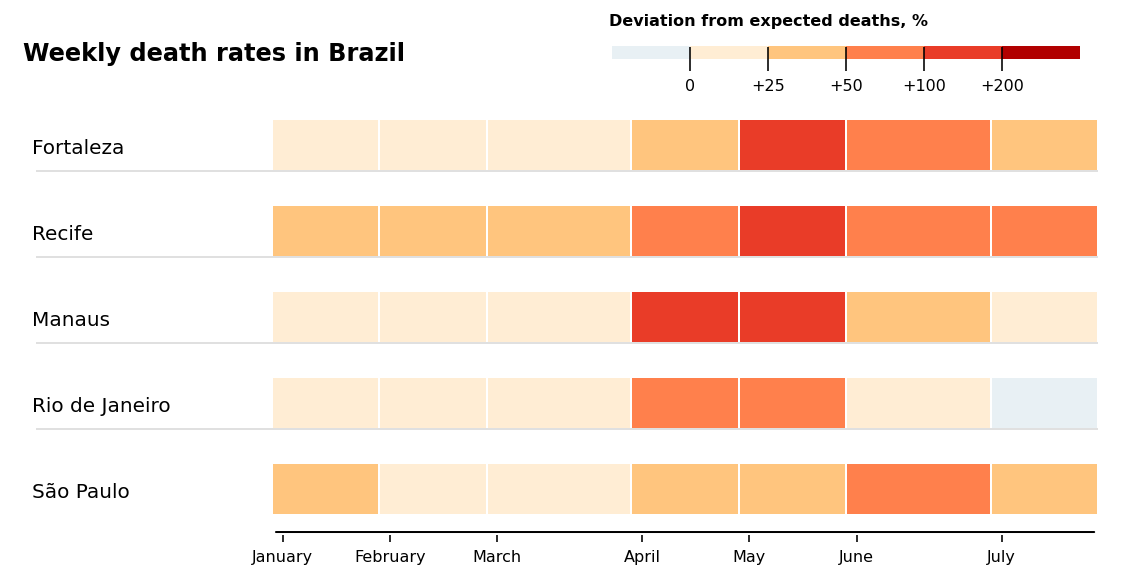

In [168]:
fig,ax = plt.subplots(1,1, figsize=(10,4)) 

regions = death.region.unique()
num_regions = len(regions)
ones = np.ones(num_regions)

x_axis = np.array([0, 1, 2, 3.35, 4.35, 5.35, 6.7, 7.7])

for month in range(7,0, -1):
    ax.barh(regions, x_axis[month]*ones
            ,height=0.6
            ,color=death[death.month == month]['color_hex'], 
            align='center',
            edgecolor='white')

# Adding color bar
bounds = [1,2,3,4,5,6,7]
boundaries = ['', '0', '+25', '+50', '+100', '+200']

ax_c = fig.add_axes([0.54, 0.95, 0.325, 0.024])
cmap = mpl.colors.ListedColormap(color.values())

cb2 = ColorbarBase(ax_c, cmap=cmap,
                   boundaries=bounds,
                   orientation='horizontal'
                  )

cb2.set_label('Deviation from expected deaths, %' + ' '*11, 
              fontsize=8,fontweight='bold', labelpad=-40, 
              x=0.4,y=45)
cb2.set_ticklabels(boundaries)
cb2.ax.tick_params(labelsize=8, length=12, direction='inout')
cb2.outline.set_visible(False)

# set first and last tick invisible in colorbar
ticks_ls = cb2.ax.xaxis.get_major_ticks()
ticks_ls[0].set_visible(False)
ticks_ls[-1].set_visible(False)


# hide spines   
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


# add title
ax.set_title("Weekly death rates in Brazil" + " "*20
             ,horizontalalignment='right' 
             ,fontweight='bold'
            ,pad=20)


# add gridlines
ax.spines['left'].set_position('zero')
ax.hlines([ 0.7, 1.7, 2.7, 3.7],-2.2,7.7, color='grey', alpha=0.3, lw=0.8)

# redraw x-axis
ax.spines['bottom'].set_visible(False)
ax.set_xlim(-2.4, 8)
h=-0.5
ax.annotate('', xy=(0,h), xytext=(7.7,h), xycoords='data', arrowprops=dict(arrowstyle='-'))


# configure y-axis alignment
ax.set_yticks(np.linspace(0,4,5))
ax.set_yticklabels(regions, ha='left')
ax.get_yaxis().set_tick_params(pad=120)
ax.yaxis.set_tick_params(length=0)


# configure x-axis alignment
ax.set_xticks(x_axis[:-1] +0.1)
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July']
                   ,fontsize=8 ,ha='center',fontfamily='sans-serif'
                   ,fontstretch='condensed',fontweight='ultralight'
                  )


plt.show()
